<a href="https://colab.research.google.com/github/AnaChavezHdz/Comulative-distributio-function/blob/main/Comulative_distribution_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install rdkit

In [7]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MACCSkeys, AllChem
from scipy.spatial.distance import pdist

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Leer bases de datos

In [11]:
# For database in .csv
subset_a = pd.read_csv("https://raw.githubusercontent.com/AnaChavezHdz/Natural-products-subsets-generation/main/DATA%20SETS/UNPD_subset_A_14994_curada_NPL_score.csv")
subset_b = pd.read_csv("https://raw.githubusercontent.com/AnaChavezHdz/Natural-products-subsets-generation/main/DATA%20SETS/UNPD_subset_B_7497_curada_NPL_score.csv")
subset_c = pd.read_csv("https://raw.githubusercontent.com/AnaChavezHdz/Natural-products-subsets-generation/main/DATA%20SETS/UNPD_subset_C_4998_curada_NPL_score.csv")

In [12]:
subset_a = subset_a[['SMILES_chiral']]
subset_b = subset_b[['SMILES_chiral']]
subset_c = subset_c[['SMILES_chiral']]

In [13]:
print(subset_b.columns)

Index(['SMILES_chiral'], dtype='object')


In [17]:
subset_a = subset_a.head(1000)
subset_b = subset_b.head(1000)
subset_c = subset_c.head(1000)

In [18]:
smi_a = list(subset_a["SMILES_chiral"])
smi_b = list(subset_b["SMILES_chiral"])
smi_c = list(subset_c["SMILES_chiral"])

In [19]:
len(smi_c)

1000

### 2. Definir función

In [20]:
def ECFP (smi, r):
    fps = pd.DataFrame([[int(y) for y in AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(x), r, nBits=1024).ToBitString()] for x in smi])
    SimMat = 1 - pdist(fps[[x for x in range(1024)]], metric="jaccard") # Similarity Matrix
    #print(SimMat.shape)
    #SimMat = round(np.median(SimMat), 3)
    return SimMat

In [21]:
def MACCSkeys_fp (smi):
    fps = pd.DataFrame([[int(y) for y in MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(x)).ToBitString()] for x in smi])
    SimMat = 1 - pdist(fps[[x for x in range(167)]], metric="jaccard") # Similarity Matrix
    #print(SimMat.shape)
    #SimMat = round(np.median(SimMat), 3)
    return SimMat

### 3. Sort data

In [22]:
# sort the data
SimMatECFP4_subset_a_sorted = np.sort(ECFP(smi_a, 2))
SimMatECFP4_subset_b_sorted = np.sort(ECFP(smi_b, 2))
SimMatECFP4_subset_c_sorted = np.sort(ECFP(smi_c, 2))

print(SimMatECFP4_subset_a_sorted.shape)
print(SimMatECFP4_subset_b_sorted.shape)
print(SimMatECFP4_subset_c_sorted.shape)


(499500,)
(499500,)
(499500,)


In [23]:
SimMatECFP4_subset_a_sorted

array([0.        , 0.        , 0.        , ..., 0.92156863, 0.92857143,
       1.        ])

In [24]:
# sort the data
SimMatECFP6_subset_a_sorted = np.sort(ECFP(smi_a, 3))
SimMatECFP6_subset_b_sorted = np.sort(ECFP(smi_b, 3))
SimMatECFP6_subset_c_sorted = np.sort(ECFP(smi_c, 3))

print(SimMatECFP6_subset_a_sorted.shape)
print(SimMatECFP6_subset_b_sorted.shape)
print(SimMatECFP6_subset_c_sorted.shape)


(499500,)
(499500,)
(499500,)


In [25]:
# sort the data
SimMatMACCSkeys_subset_a_sorted = np.sort(MACCSkeys_fp(smi_a))
SimMatMACCSkeys_subset_b_sorted = np.sort(MACCSkeys_fp(smi_b))
SimMatMACCSkeys_subset_c_sorted = np.sort(MACCSkeys_fp(smi_c))

print(SimMatMACCSkeys_subset_a_sorted.shape)
print(SimMatMACCSkeys_subset_b_sorted.shape)
print(SimMatMACCSkeys_subset_c_sorted.shape)


(499500,)
(499500,)
(499500,)


### 4. Definir estadísticos

In [26]:
data = [SimMatECFP4_subset_a_sorted,
        SimMatECFP4_subset_b_sorted,
        SimMatECFP4_subset_c_sorted,

        SimMatECFP6_subset_a_sorted,
        SimMatECFP6_subset_b_sorted,
        SimMatECFP6_subset_c_sorted,

        SimMatMACCSkeys_subset_a_sorted,
        SimMatMACCSkeys_subset_b_sorted,
        SimMatMACCSkeys_subset_c_sorted,
        ]
columns = ["ECFP4_subset_a",
        "ECFP4_subset_b",
        "ECFP4_subset_c",

        "ECFP6_subset_a",
        "ECFP6_subset_b",
        "ECFP6_subset_c",

        "MACCSkeys_subset_a",
        "MACCSkeys_subset_b",
        "MACCSkeys_subset_c"
        ]

In [27]:
data = np.transpose(data)
data = pd.DataFrame(data, columns=columns)
data.tail(2)

,ECFP4_subset_a,ECFP4_subset_b,ECFP4_subset_c,ECFP6_subset_a,ECFP6_subset_b,ECFP6_subset_c,MACCSkeys_subset_a,MACCSkeys_subset_b,MACCSkeys_subset_c
499498,0.928571,1.0,1.0,0.885714,1.0,1.0,1.0,1.0,1.0
499499,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0


In [28]:
data = data.describe()
data = data.round(3)
data

,ECFP4_subset_a,ECFP4_subset_b,ECFP4_subset_c,ECFP6_subset_a,ECFP6_subset_b,ECFP6_subset_c,MACCSkeys_subset_a,MACCSkeys_subset_b,MACCSkeys_subset_c
count,499500.000,499500.000,499500.000,499500.000,499500.000,499500.000,499500.000,499500.000,499500.000
mean,0.116,0.100,0.087,0.095,0.082,0.072,0.413,0.353,0.270
std,0.054,0.065,0.067,0.041,0.050,0.051,0.164,0.197,0.178
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.080,0.059,0.042,0.068,0.051,0.038,0.298,0.208,0.133
50%,0.110,0.094,0.074,0.092,0.079,0.063,0.407,0.348,0.235
75%,0.144,0.131,0.118,0.117,0.107,0.096,0.523,0.487,0.380
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [31]:
data.to_csv("my_description.csv", index=True)

In [32]:
describe= pd.read_csv("/content/my_description.csv")
describe.columns = ['Stadistics', 'ECFP4_subset_a', 'ECFP4_subset_b', 'ECFP4_subset_c',
       'ECFP6_subset_a', 'ECFP6_subset_b', 'ECFP6_subset_c',
       'MACCSkeys_subset_a', 'MACCSkeys_subset_b', 'MACCSkeys_subset_c']
describe

,Stadistics,ECFP4_subset_a,ECFP4_subset_b,ECFP4_subset_c,ECFP6_subset_a,ECFP6_subset_b,ECFP6_subset_c,MACCSkeys_subset_a,MACCSkeys_subset_b,MACCSkeys_subset_c
0,count,499500.000,499500.000,499500.000,499500.000,499500.000,499500.000,499500.000,499500.000,499500.000
1,mean,0.116,0.100,0.087,0.095,0.082,0.072,0.413,0.353,0.270
2,std,0.054,0.065,0.067,0.041,0.050,0.051,0.164,0.197,0.178
3,min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,25%,0.080,0.059,0.042,0.068,0.051,0.038,0.298,0.208,0.133
5,50%,0.110,0.094,0.074,0.092,0.079,0.063,0.407,0.348,0.235
6,75%,0.144,0.131,0.118,0.117,0.107,0.096,0.523,0.487,0.380
7,max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [33]:
std = list(describe["Stadistics"])

In [34]:
arr = describe.to_numpy()
print(arr.shape)
arr = np.transpose(arr)
print(arr.shape)

(8, 10)
(10, 8)


In [35]:
df = pd.DataFrame(arr, columns=std)
df

,count,mean,std,min,25%,50%,75%,max
0,count,mean,std,min,25%,50%,75%,max
1,499500.0,0.116,0.054,0.0,0.08,0.11,0.144,1.0
2,499500.0,0.1,0.065,0.0,0.059,0.094,0.131,1.0
3,499500.0,0.087,0.067,0.0,0.042,0.074,0.118,1.0
4,499500.0,0.095,0.041,0.0,0.068,0.092,0.117,1.0
5,499500.0,0.082,0.05,0.0,0.051,0.079,0.107,1.0
6,499500.0,0.072,0.051,0.0,0.038,0.063,0.096,1.0
7,499500.0,0.413,0.164,0.0,0.298,0.407,0.523,1.0
8,499500.0,0.353,0.197,0.0,0.208,0.348,0.487,1.0
9,499500.0,0.27,0.178,0.0,0.133,0.235,0.38,1.0


In [36]:
df2 = df.iloc[1:]
df2 = df2.reset_index(drop=True)
df2

,count,mean,std,min,25%,50%,75%,max
0,499500.0,0.116,0.054,0.0,0.08,0.11,0.144,1.0
1,499500.0,0.1,0.065,0.0,0.059,0.094,0.131,1.0
2,499500.0,0.087,0.067,0.0,0.042,0.074,0.118,1.0
3,499500.0,0.095,0.041,0.0,0.068,0.092,0.117,1.0
4,499500.0,0.082,0.05,0.0,0.051,0.079,0.107,1.0
5,499500.0,0.072,0.051,0.0,0.038,0.063,0.096,1.0
6,499500.0,0.413,0.164,0.0,0.298,0.407,0.523,1.0
7,499500.0,0.353,0.197,0.0,0.208,0.348,0.487,1.0
8,499500.0,0.27,0.178,0.0,0.133,0.235,0.38,1.0


In [37]:
df2["data set"] = ['ECFP4_subset_a', 'ECFP4_subset_b', 'ECFP4_subset_c',
                  'ECFP6_subset_a', 'ECFP6_subset_b', 'ECFP6_subset_c',
                  'MACCSkeys_subset_a', 'MACCSkeys_subset_b', 'MACCSkeys_subset_c']

In [38]:
df2

,count,mean,std,min,25%,50%,75%,max,data set
0,499500.0,0.116,0.054,0.0,0.08,0.11,0.144,1.0,ECFP4_subset_a
1,499500.0,0.1,0.065,0.0,0.059,0.094,0.131,1.0,ECFP4_subset_b
2,499500.0,0.087,0.067,0.0,0.042,0.074,0.118,1.0,ECFP4_subset_c
3,499500.0,0.095,0.041,0.0,0.068,0.092,0.117,1.0,ECFP6_subset_a
4,499500.0,0.082,0.05,0.0,0.051,0.079,0.107,1.0,ECFP6_subset_b
5,499500.0,0.072,0.051,0.0,0.038,0.063,0.096,1.0,ECFP6_subset_c
6,499500.0,0.413,0.164,0.0,0.298,0.407,0.523,1.0,MACCSkeys_subset_a
7,499500.0,0.353,0.197,0.0,0.208,0.348,0.487,1.0,MACCSkeys_subset_b
8,499500.0,0.27,0.178,0.0,0.133,0.235,0.38,1.0,MACCSkeys_subset_c


In [39]:
# calculate the proportional values of samples for ECFP4 y ECFP6
proportionECFP_A = 1. * np.arange(len(SimMatECFP4_subset_a_sorted)) / (len(SimMatECFP4_subset_a_sorted) - 1)
print(len(proportionECFP_A))
proportionECFP_B = 1. * np.arange(len(SimMatECFP4_subset_b_sorted)) / (len(SimMatECFP4_subset_b_sorted) - 1)
print(len(proportionECFP_B))
proportionECFP_C = 1. * np.arange(len(SimMatECFP4_subset_c_sorted)) / (len(SimMatECFP4_subset_c_sorted) - 1)
print(len(proportionECFP_C))

# calculate the proportional values of samples Ffor MACCS keys
proportionMACCSkeys_A = 1. * np.arange(len(SimMatMACCSkeys_subset_a_sorted)) / (len(SimMatMACCSkeys_subset_a_sorted) - 1)
print(len(proportionMACCSkeys_A))
proportionMACCSkeys_B = 1. * np.arange(len(SimMatMACCSkeys_subset_b_sorted)) / (len(SimMatMACCSkeys_subset_b_sorted) - 1)
print(len(proportionMACCSkeys_B))
proportionMACCSkeys_C = 1. * np.arange(len(SimMatMACCSkeys_subset_c_sorted)) / (len(SimMatMACCSkeys_subset_c_sorted) - 1)
print(len(proportionMACCSkeys_C))

499500
499500
499500
499500
499500
499500


### Plot cumaltive distribution function

Mounted at /content/drive


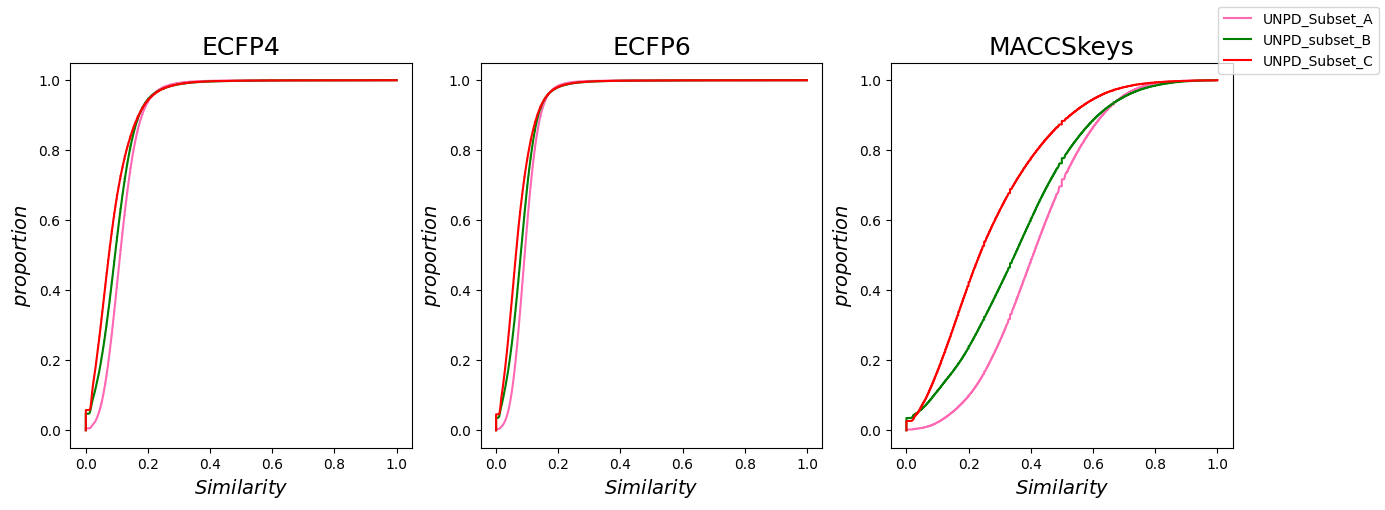

In [44]:
# plot the sorted data:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(15,5)
ax1 = fig.add_subplot(131)
ax1.plot(SimMatECFP4_subset_a_sorted, proportionECFP_A, label="UNPD_Subset_A", c="hotpink")
ax1.plot(SimMatECFP4_subset_b_sorted, proportionECFP_B, label="UNPD_subset_B", c="green")
ax1.plot(SimMatECFP4_subset_c_sorted, proportionECFP_C, label="UNPD_Subset_C", c="red")

ax1.set_xlabel('$Similarity$', fontsize=14)
ax1.set_ylabel('$proportion$', fontsize=14)
ax1.set_title('ECFP4', fontsize=18)
#fig.legend()

ax2 = fig.add_subplot(132)
ax2.plot(SimMatECFP6_subset_a_sorted, proportionECFP_A, c="hotpink") #, label="UNPD_Subset_A")
ax2.plot(SimMatECFP6_subset_b_sorted, proportionECFP_B, c="green") #, label="UNPD_subset_B")
ax2.plot(SimMatECFP6_subset_c_sorted, proportionECFP_C, c="red") #, label="UNPD_subset_B")

ax2.set_xlabel('$Similarity$', fontsize=14)
ax2.set_ylabel('$proportion$', fontsize=14)
ax2.set_title('ECFP6', fontsize=18)

ax3 = fig.add_subplot(133)
ax3.plot(SimMatMACCSkeys_subset_a_sorted, proportionMACCSkeys_A, c="hotpink") #, label="UNPD_Subset_A")
ax3.plot(SimMatMACCSkeys_subset_b_sorted, proportionMACCSkeys_B, c="green") #, label="UNPD_subset_B")
ax3.plot(SimMatMACCSkeys_subset_c_sorted, proportionMACCSkeys_C, c="red") #, label="UNPD_subset_B")

ax3.set_xlabel('$Similarity$',fontsize=14)
ax3.set_ylabel('$proportion$', fontsize=14)
ax3.set_title('MACCSkeys', fontsize=18)

#fig.legend()
fig.legend(loc='upper right', fontsize=10)

# Guardar figura
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
plt.savefig("Comulative distribution function.jpg")